# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Step 1 - Import the Libraries

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
%matplotlib inline

## Step 2 - Load the Data

In [3]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Step 3 - Explore the Data

### 3.1. Using World Map to explore where the data lies on

#### 3.1.1. Convert Country Name to Contry Code Using `Pycountry_convert` Library

In [4]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)


In [5]:
df['Country & Continent'] = df['Country'].apply(get_continent)
df['Country Code'] = df['Country & Continent'].apply(lambda x: x[0])
df['Continent'] = df['Country & Continent'].apply(lambda x: x[1])
df.drop(['Country & Continent'], axis=1, inplace=True)
df

,Country,Year,Life expectancy at birth (years),GDP,Country Code,Continent
0,Chile,2000,77.3,7.786093e+10,CL,SA
1,Chile,2001,77.3,7.097992e+10,CL,SA
2,Chile,2002,77.8,6.973681e+10,CL,SA
3,Chile,2003,77.9,7.564346e+10,CL,SA
4,Chile,2004,78.0,9.921039e+10,CL,SA
...,...,...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10,ZW,AF
92,Zimbabwe,2012,56.6,1.424249e+10,ZW,AF
93,Zimbabwe,2013,58.0,1.545177e+10,ZW,AF
94,Zimbabwe,2014,59.2,1.589105e+10,ZW,AF


#### 3.1.2. Convert Country to Latitude and Longitude Using `GeoPy`

In [6]:
from geopy.geocoders import Nominatim

In [7]:
geolocator = Nominatim(user_agent="KyleNg")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan


In [8]:
df['Latitude & Longitude'] = df['Country'].apply(geolocate)

In [9]:
df['Latitude'] = df['Latitude & Longitude'].apply(lambda x : x[0])
df['Longitude'] = df['Latitude & Longitude'].apply(lambda x : x[1])
df.drop(['Latitude & Longitude'],axis=1,inplace=True)
df

,Country,Year,Life expectancy at birth (years),GDP,Country Code,Continent,Latitude,Longitude
0,Chile,2000,77.3,7.786093e+10,CL,SA,-31.761336,-71.318770
1,Chile,2001,77.3,7.097992e+10,CL,SA,-31.761336,-71.318770
2,Chile,2002,77.8,6.973681e+10,CL,SA,-31.761336,-71.318770
3,Chile,2003,77.9,7.564346e+10,CL,SA,-31.761336,-71.318770
4,Chile,2004,78.0,9.921039e+10,CL,SA,-31.761336,-71.318770
...,...,...,...,...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10,ZW,AF,-18.455496,29.746841
92,Zimbabwe,2012,56.6,1.424249e+10,ZW,AF,-18.455496,29.746841
93,Zimbabwe,2013,58.0,1.545177e+10,ZW,AF,-18.455496,29.746841
94,Zimbabwe,2014,59.2,1.589105e+10,ZW,AF,-18.455496,29.746841


#### 3.1.3. Using `folium` to plot World Map

In [10]:
import folium
from folium.plugins import MarkerCluster

world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
for i in range(len(df)):
        lat = df.iloc[i]['Latitude']
        long = df.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    GDP : {}<br>
                    Year: {} <br>"""
        popup_text = popup_text.format(df.iloc[i]['Country'],
                                   df.iloc[i]['GDP'],
                                   df.iloc[i]['Year']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
world_map

### Step 3.2 - Explore Life Expectancy and GDP by Histograms

In [21]:
fig = px.histogram(df,x='Life expectancy at birth (years)',title='Life Expectancy Distribution',marginal="rug")
fig.show()

In [19]:
fig = px.histogram(df, x='GDP',title='GDP Distribution',marginal="rug")
fig.show()

In [24]:
dfMean = df.drop('Year',axis=1).groupby('Country').mean().reset_index()
dfMean

,Country,Life expectancy at birth (years),GDP,Latitude,Longitude
0,Chile,78.94375,1.697888e+11,-31.761336,-71.318770
1,China,74.26250,4.957714e+12,35.000074,104.999927
2,Germany,79.65625,3.094776e+12,51.083420,10.423447
3,Mexico,75.71875,9.766506e+11,23.658512,-102.007710
4,United States of America,78.06250,1.407500e+13,39.783730,-100.445882
5,Zimbabwe,50.09375,9.062580e+09,-18.455496,29.746841


In [29]:
fig = px.bar(df.drop('Year',axis=1).groupby('Country').mean().reset_index(), x='Life expectancy at birth (years)',y='Country',title='Mean Life Expectancy Across Countries')
fig.show()

In [31]:
fig = px.bar(df.drop('Year',axis=1).groupby('Country').mean().reset_index(), x='GDP',y='Country',title='Mean GDP Across Country')
fig.show()

#### Using Boxplots and Stripplot to demonstrate the central tendency of GDP and LEAP across contries

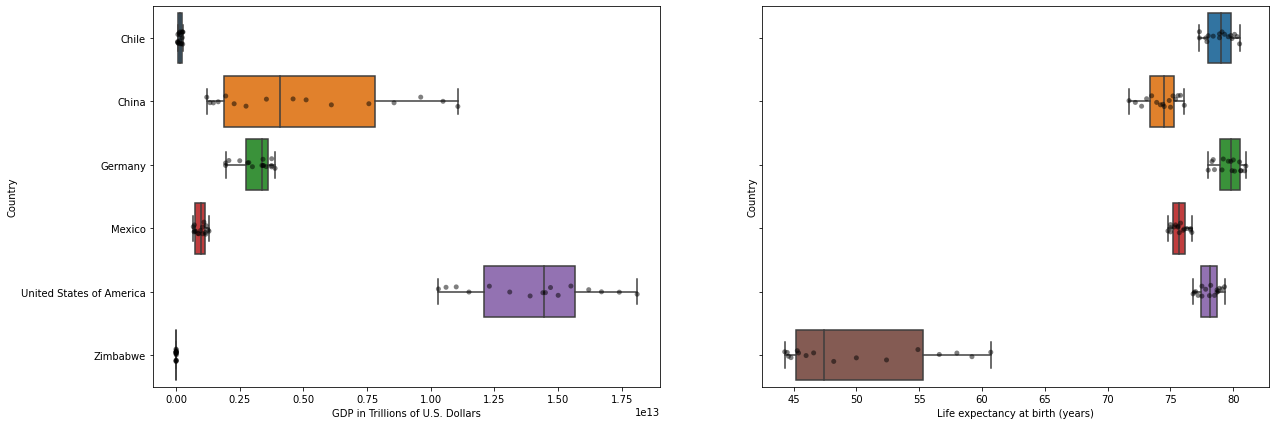

In [65]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20, 7))

ax1 = plt.subplot(1,2,1)
sns.boxplot(x=df.GDP, y=df.Country)
sns.stripplot(x=df.GDP, y=df.Country,color='black',alpha=0.5,jitter=0.1)
ax1.set_xlabel('GDP in Trillions of U.S. Dollars')

ax2 = plt.subplot(1,2,2)
sns.boxplot(x=df['Life expectancy at birth (years)'],y=df['Country'])
sns.stripplot(x=df['Life expectancy at birth (years)'], y=df.Country,color='black',alpha=0.5,jitter=0.1)
ax2.set_xlabel('Life expectancy at birth (years)')
plt.show()